In [1]:
import matplotlib.pyplot as mp
import numpy as np
import optical
import lightcurves
import sys
%matplotlib inline 


In [2]:
target = 'NGC6121'
folder = '/Users/jrneeley/CRRP/'+target+'/'
optical_folder = '/Users/jrneeley/CRRP/OpticalCatalogs/'

Read in variables from Clement catalog

In [3]:
dtype1 = np.dtype([('id', int), ('period', float)])
data = np.loadtxt(folder+target+'-clement.txt', dtype=dtype1, usecols=(0,3))

In [4]:
datasets = optical.compile_datasets(optical_folder, target)
print 'Datasets:'
print datasets

Datasets:
['danish' 'Y1007' 'manu' 'wfi5' 'emmi8' 'bond5' 'wfi6' 'bond7' 'wfi10'
 'not017' 'fors20605' 'apr97' 'pwm']


In [5]:
ind=0
lcv_file = optical_folder+target+'lcvs/'+target+'V'+str(data['id'][ind])+'.lcv'
lcv = str(data['id'][ind])

10000 10000


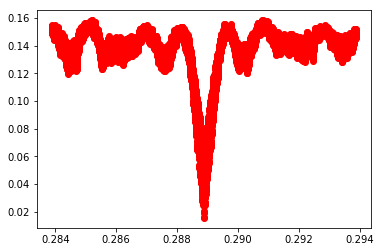

0.28888209995
Star  Period  Period_new  Frequency
V1 0.2888826 0.28888209995 3.4616198102


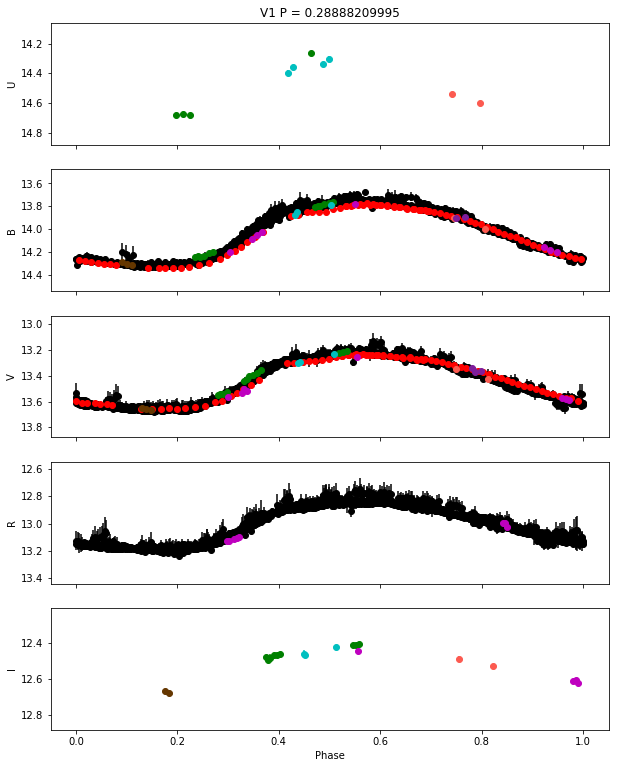

In [6]:
U, B, V, R, I = lightcurves.read_optical_lcv(lcv_file, old=1)
period = lightcurves.period_search(V, data['period'][ind])
print 'Star  Period  Period_new  Frequency'
print 'V'+lcv, data['period'][ind], period, 1/period
lightcurves.plot_phased_optical_lcv(U, B, V, R, I, period, 'V'+str(lcv), datasets)

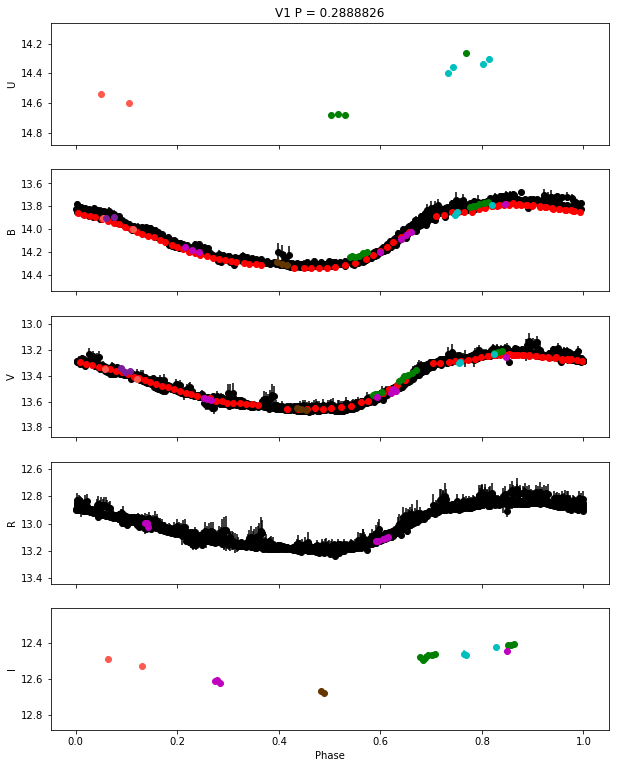

In [7]:
lightcurves.plot_phased_optical_lcv(U, B, V, R, I, 0.2888826, 'V'+str(lcv), datasets)